<a href="https://colab.research.google.com/github/DheniMoura/stock-analysis/blob/main/Stock_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance


     |████████████████████████████████| 63 kB 1.3 MB/s 
     |████████████████████████████████| 6.4 MB 9.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import yfinance as yf


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


COLETA DE DADOS

In [3]:
ticket = yf.Ticker('^BVSP')
df = ticket.history(interval='1d', start='2020-01-01', end='2022-01-01')


In [4]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02,115652.0,118573.0,115649.0,118573.0,5162700,0,0
2020-01-03,118564.0,118792.0,117341.0,117707.0,6834500,0,0
2020-01-06,117707.0,117707.0,116269.0,116878.0,6570000,0,0
2020-01-07,116872.0,117076.0,115965.0,116662.0,4854100,0,0
2020-01-08,116667.0,117335.0,115693.0,116247.0,5910500,0,0
...,...,...,...,...,...,...,...
2021-12-23,105251.0,105453.0,104637.0,104891.0,7283600,0,0
2021-12-27,104892.0,105694.0,104798.0,105531.0,7594900,0,0
2021-12-28,105555.0,105652.0,104503.0,104864.0,7509000,0,0


In [5]:
df.tail() #mostra as últimas linhas

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-12-23,105251.0,105453.0,104637.0,104891.0,7283600,0,0
2021-12-27,104892.0,105694.0,104798.0,105531.0,7594900,0,0
2021-12-28,105555.0,105652.0,104503.0,104864.0,7509000,0,0
2021-12-29,104863.0,105190.0,103851.0,104107.0,6590000,0,0
2021-12-30,104106.0,105269.0,104106.0,104822.0,11138100,0,0


In [6]:
df[['Close']].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 495 entries, 2020-01-02 to 2021-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   495 non-null    float64
dtypes: float64(1)
memory usage: 7.7 KB


In [7]:
df[['Close']].head() #mostra as primeiras linhas

,Close
Date,
2020-01-02,118573.0
2020-01-03,117707.0
2020-01-06,116878.0
2020-01-07,116662.0
2020-01-08,116247.0


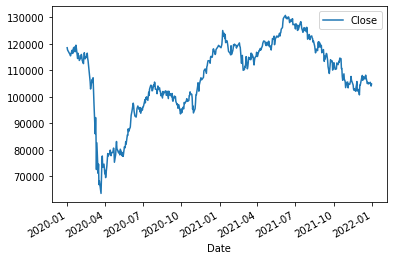

In [8]:
df[['Close']].plot()

DECOMPOSIÇÃO DE UMA SÉRIE TEMPORAL (modelo aditivo / modelo multiplicativo)

In [9]:
decomposicao = seasonal_decompose(df[['Close']], model='additive', freq=30, extrapolate_trend=30)

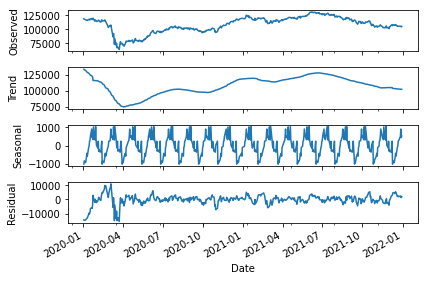

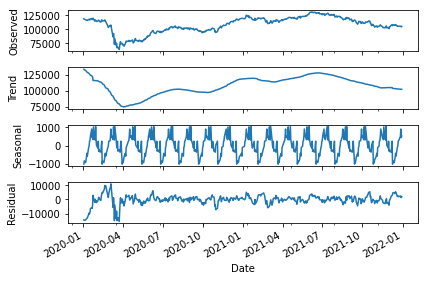

In [10]:
decomposicao.plot()

In [11]:
decomposicao_multi = seasonal_decompose(df[['Close']], model='multiplicative', freq=30, extrapolate_trend=30)

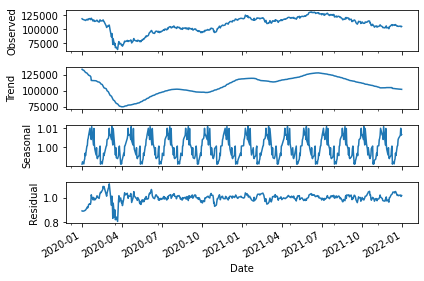

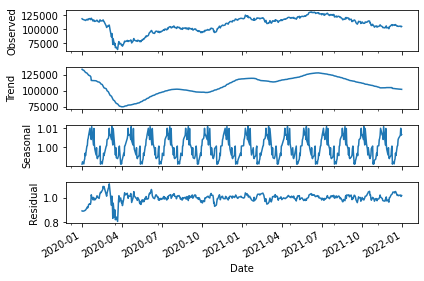

In [12]:
decomposicao_multi.plot()

In [13]:
max(decomposicao.resid)

'Close'

No gráfico a seguir a linha azul é referente ao valor do ticker, enquanto a linha laranja é a linha de tendência

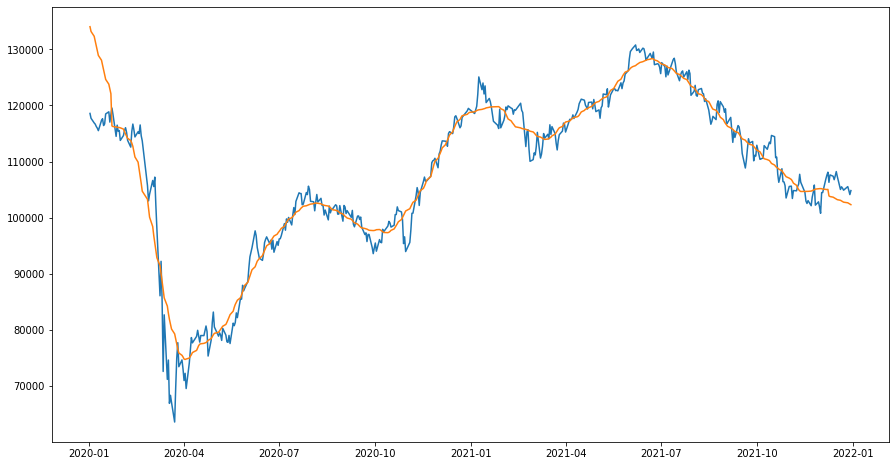

In [14]:
ax, fig = plt.subplots(figsize=(15,8))
plt.plot(decomposicao.observed)
plt.plot(decomposicao.trend)

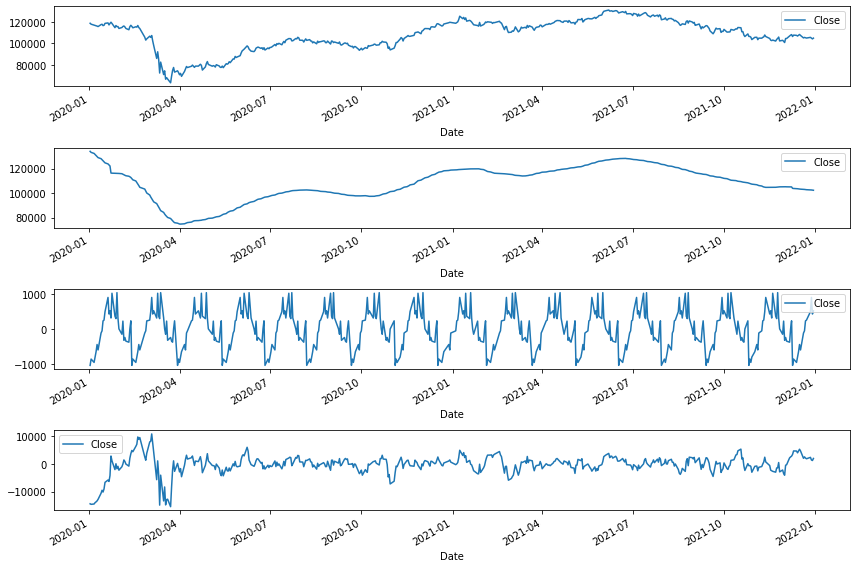

In [15]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(12,8))
decomposicao.observed.plot(ax=ax1)
decomposicao.trend.plot(ax=ax2)
decomposicao.seasonal.plot(ax=ax3)
decomposicao.resid.plot(ax=ax4)
plt.tight_layout() #Serve para melhorar um pouco o layout de apresentação

CALCULO DE MÉDIA MÓVEL

In [16]:
df['Close'].rolling(7).mean() #o método rolling faz a média móvelna janela de tempo determinada

Date
2020-01-02              NaN
2020-01-03              NaN
2020-01-06              NaN
2020-01-07              NaN
2020-01-08              NaN
                  ...      
2021-12-23    106231.428571
2021-12-27    105960.000000
2021-12-28    105481.714286
2021-12-29    105022.428571
2021-12-30    104994.142857
Name: Close, Length: 495, dtype: float64

In [17]:
media_movel9d = df['Close'].rolling(9).mean()
media_movel20d = df['Close'].rolling(20).mean()
media_movel50d = df['Close'].rolling(50).mean()

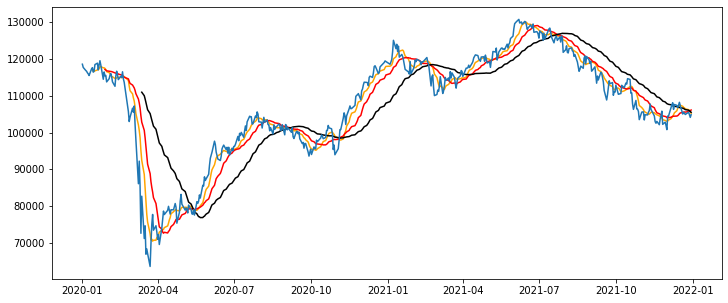

In [18]:
fig, ax = plt.subplots(figsize=(12,5))
plt.plot(media_movel9d, 'orange')
plt.plot(media_movel20d, 'red')
plt.plot(media_movel50d, 'black')
plt.plot(df['Close'])

EXTRAÇÃO DE FEATURES

In [19]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02,115652.0,118573.0,115649.0,118573.0,5162700,0,0
2020-01-03,118564.0,118792.0,117341.0,117707.0,6834500,0,0
2020-01-06,117707.0,117707.0,116269.0,116878.0,6570000,0,0
2020-01-07,116872.0,117076.0,115965.0,116662.0,4854100,0,0
2020-01-08,116667.0,117335.0,115693.0,116247.0,5910500,0,0


In [20]:
df.reset_index(inplace=True)

In [21]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-01-02,115652.0,118573.0,115649.0,118573.0,5162700,0,0
1,2020-01-03,118564.0,118792.0,117341.0,117707.0,6834500,0,0
2,2020-01-06,117707.0,117707.0,116269.0,116878.0,6570000,0,0
3,2020-01-07,116872.0,117076.0,115965.0,116662.0,4854100,0,0
4,2020-01-08,116667.0,117335.0,115693.0,116247.0,5910500,0,0


In [22]:
# Criar features para cada período
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [23]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,year,month,day
0,2020-01-02,115652.0,118573.0,115649.0,118573.0,5162700,0,0,2020,1,2
1,2020-01-03,118564.0,118792.0,117341.0,117707.0,6834500,0,0,2020,1,3
2,2020-01-06,117707.0,117707.0,116269.0,116878.0,6570000,0,0,2020,1,6
3,2020-01-07,116872.0,117076.0,115965.0,116662.0,4854100,0,0,2020,1,7
4,2020-01-08,116667.0,117335.0,115693.0,116247.0,5910500,0,0,2020,1,8


In [24]:
# Rentabilidade é preçoatual/preço anterior * 100 - 100
df[['Close']]

,Close
0,118573.0
1,117707.0
2,116878.0
3,116662.0
4,116247.0
...,...
490,104891.0
491,105531.0
492,104864.0
493,104107.0


In [25]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,year,month,day
0,2020-01-02,115652.0,118573.0,115649.0,118573.0,5162700,0,0,2020,1,2
1,2020-01-03,118564.0,118792.0,117341.0,117707.0,6834500,0,0,2020,1,3
2,2020-01-06,117707.0,117707.0,116269.0,116878.0,6570000,0,0,2020,1,6
3,2020-01-07,116872.0,117076.0,115965.0,116662.0,4854100,0,0,2020,1,7
4,2020-01-08,116667.0,117335.0,115693.0,116247.0,5910500,0,0,2020,1,8


In [26]:
df['Close'].shift()

0           NaN
1      118573.0
2      117707.0
3      116878.0
4      116662.0
         ...   
490    105244.0
491    104891.0
492    105531.0
493    104864.0
494    104107.0
Name: Close, Length: 495, dtype: float64

In [27]:
df['Rentabilidade'] = df['Close'] / df['Close'].shift() * 100 - 100

In [28]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,year,month,day,Rentabilidade
0,2020-01-02,115652.0,118573.0,115649.0,118573.0,5162700,0,0,2020,1,2,NaN
1,2020-01-03,118564.0,118792.0,117341.0,117707.0,6834500,0,0,2020,1,3,-0.730352
2,2020-01-06,117707.0,117707.0,116269.0,116878.0,6570000,0,0,2020,1,6,-0.704291
3,2020-01-07,116872.0,117076.0,115965.0,116662.0,4854100,0,0,2020,1,7,-0.184808
4,2020-01-08,116667.0,117335.0,115693.0,116247.0,5910500,0,0,2020,1,8,-0.355729


In [29]:
def features_extraction(df_):
  # Criar features para cada período
  df_['year'] = df_['Date'].dt.year
  df_['month'] = df_['Date'].dt.month
  df_['day'] = df_['Date'].dt.day
  df_['Rentabilidade'] = df_['Close'] / df_['Close'].shift() *100 - 100

In [30]:
df.reset_index(inplace=True)

In [31]:
features_extraction(df)

In [32]:
df.head()

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,year,month,day,Rentabilidade
0,0,2020-01-02,115652.0,118573.0,115649.0,118573.0,5162700,0,0,2020,1,2,NaN
1,1,2020-01-03,118564.0,118792.0,117341.0,117707.0,6834500,0,0,2020,1,3,-0.730352
2,2,2020-01-06,117707.0,117707.0,116269.0,116878.0,6570000,0,0,2020,1,6,-0.704291
3,3,2020-01-07,116872.0,117076.0,115965.0,116662.0,4854100,0,0,2020,1,7,-0.184808
4,4,2020-01-08,116667.0,117335.0,115693.0,116247.0,5910500,0,0,2020,1,8,-0.355729


**Hipotese 1 - Existe um melhor mês para investir no ativo?**
Considerando o período de dados de rentabilidade, o agrupamento mostra que os meses de fevereiro, março e setembro são mais 
interessantes para investir. *N~ao esquecer que esses dados possuem ruído e o gráfico a baixo deve ser considerado apenas para fins de aprendizado.

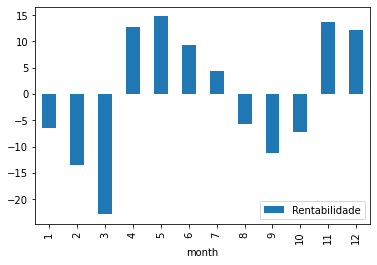

In [33]:
df.groupby('month').agg({'Rentabilidade':'sum'}).plot(kind='bar') #.agg para agregar os dados

In [34]:
df.set_index('Date', inplace=True)

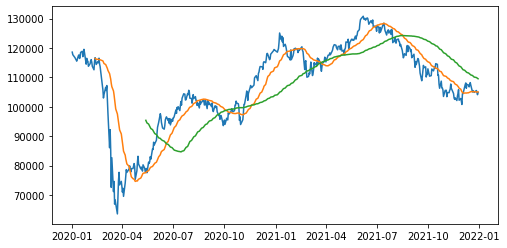

In [35]:
media_movel30d = df['Close'].rolling(30).mean()
media_movel90d = df['Close'].rolling(90).mean()
fig, ax = plt.subplots(figsize=(8,4))
plt.plot(df['Close'])
plt.plot(media_movel30d)
plt.plot(media_movel90d)

**Hipotese 2 - Existe um melhor dia para investir um ativo?** seguindo essa análise os melhores dias seriam 12,16 e 26.

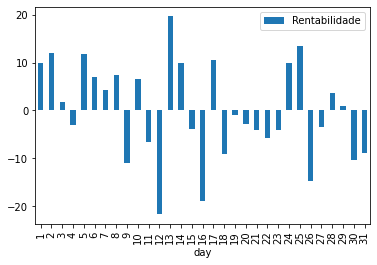

In [37]:
df.groupby('day').agg({'Rentabilidade':'sum'}).plot(kind='bar')

In [38]:
df.iloc[0]

index                  0.0
Open              115652.0
High              118573.0
Low               115649.0
Close             118573.0
Volume           5162700.0
Dividends              0.0
Stock Splits           0.0
year                2020.0
month                  1.0
day                    2.0
Rentabilidade          NaN
Name: 2020-01-02 00:00:00, dtype: float64

In [39]:
df.iloc[-1]

index            4.940000e+02
Open             1.041060e+05
High             1.052690e+05
Low              1.041060e+05
Close            1.048220e+05
Volume           1.113810e+07
Dividends        0.000000e+00
Stock Splits     0.000000e+00
year             2.021000e+03
month            1.200000e+01
day              3.000000e+01
Rentabilidade    6.867934e-01
Name: 2021-12-30 00:00:00, dtype: float64

In [41]:
df['Close'].iloc[-1] / df['Close'].iloc[0] * 100 - 100

-11.597075219485049

In [42]:
df['Rentabilidade'].sum()

-0.19164326528270692

**Correlação de séries temporais**
Analise 

In [56]:
tickets = ['VALE3.SA', 'ITUB4.SA', 'PETR4.SA', 'ABEV3.SA', 'BBDC4.SA', 'BBAS3.SA', '^BVSP', 'USDBRL=X']

In [66]:
dfs = []

for t in tickets:
  print('Reading ticker {}...'.format(t))
  ticket = yf.Ticker(t)
  aux = ticket.history(interval='1d', start='2018-01-01', end='2022-01-01')
  aux.reset_index(inplace=True)
  aux['ticket'] = t
  dfs.append(aux)

Reading ticker VALE3.SA...
Reading ticker ITUB4.SA...
Reading ticker PETR4.SA...
Reading ticker ABEV3.SA...
Reading ticker BBDC4.SA...
Reading ticker BBAS3.SA...
Reading ticker ^BVSP...
Reading ticker USDBRL=X...


In [67]:
dfs[1]

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticket
0,2018-01-02,24.028657,24.634987,24.028657,24.634987,16650900,0.01,0.0,ITUB4.SA
1,2018-01-03,24.646219,24.893242,24.460950,24.803415,22295700,0.00,0.0,ITUB4.SA
2,2018-01-04,24.842712,25.432201,24.842712,25.319916,23222550,0.00,0.0,ITUB4.SA
3,2018-01-05,25.331142,25.443426,25.039206,25.392899,15717450,0.00,0.0,ITUB4.SA
4,2018-01-08,25.297465,25.443433,25.140267,25.308693,12708150,0.00,0.0,ITUB4.SA
...,...,...,...,...,...,...,...,...,...
984,2021-12-23,21.297180,21.536811,21.137427,21.307165,22377000,0.00,0.0,ITUB4.SA
985,2021-12-27,21.446948,21.666611,21.277210,21.526825,14025800,0.00,0.0,ITUB4.SA
986,2021-12-28,21.596718,21.666612,21.367072,21.446949,15294200,0.00,0.0,ITUB4.SA
987,2021-12-29,21.496871,21.546793,21.197331,21.267223,12856100,0.00,0.0,ITUB4.SA


In [68]:
for d in dfs:
  features_extraction(d)

In [69]:
dfs[0]

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticket,year,month,day,Rentabilidade
0,2018-01-02,30.893705,31.886829,30.893705,31.871550,14156500,0.0,0,VALE3.SA,2018,1,2,NaN
1,2018-01-03,31.955587,31.993784,31.550697,31.680569,12744200,0.0,0,VALE3.SA,2018,1,3,-0.599221
2,2018-01-04,31.940307,32.368112,31.718764,31.810436,18433000,0.0,0,VALE3.SA,2018,1,4,0.409928
3,2018-01-05,31.756962,32.306999,31.558339,32.306999,15251300,0.0,0,VALE3.SA,2018,1,5,1.561006
4,2018-01-08,32.391029,33.025097,32.391029,33.025097,14542800,0.0,0,VALE3.SA,2018,1,8,2.222731
...,...,...,...,...,...,...,...,...,...,...,...,...,...
984,2021-12-23,79.949997,80.059998,78.800003,79.150002,13121200,0.0,0,VALE3.SA,2021,12,23,-0.963459
985,2021-12-27,78.870003,79.449997,78.260002,78.949997,11371400,0.0,0,VALE3.SA,2021,12,27,-0.252691
986,2021-12-28,78.510002,78.529999,76.570000,77.050003,18923700,0.0,0,VALE3.SA,2021,12,28,-2.406579
987,2021-12-29,76.379997,77.980003,76.349998,77.250000,12113500,0.0,0,VALE3.SA,2021,12,29,0.259568


In [71]:
correlacao = pd.DataFrame()
for d in dfs:
  correlacao[d['ticket'].iloc[0]] = d['Rentabilidade']

In [72]:
correlacao.head()

,VALE3.SA,ITUB4.SA,PETR4.SA,ABEV3.SA,BBDC4.SA,BBAS3.SA,^BVSP,USDBRL=X
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.599221,0.683696,0.906348,0.230517,0.454744,1.275434,0.133520,0.102796
2,0.409928,2.082376,0.179651,-0.551967,1.640716,0.959500,0.835951,-1.606765
3,1.561006,0.288243,0.597716,0.370024,0.566412,0.000000,0.539118,-0.684511
4,2.222731,-0.331611,1.188359,-0.184335,-0.028145,0.237592,0.389523,-0.074182


In [74]:
correlacao.corr() #.corr utiliza por padrão o método Pearson de correlação

,VALE3.SA,ITUB4.SA,PETR4.SA,ABEV3.SA,BBDC4.SA,BBAS3.SA,^BVSP,USDBRL=X
VALE3.SA,1.000000,0.371106,0.478635,0.245768,0.390861,0.415073,-0.136610,0.016210
ITUB4.SA,0.371106,1.000000,0.581537,0.500708,0.746968,0.781665,-0.095741,-0.061749
PETR4.SA,0.478635,0.581537,1.000000,0.410450,0.568684,0.676667,-0.142036,-0.025682
ABEV3.SA,0.245768,0.500708,0.410450,1.000000,0.450175,0.458766,-0.191730,-0.036100
BBDC4.SA,0.390861,0.746968,0.568684,0.450175,1.000000,0.752280,-0.106876,-0.048993
BBAS3.SA,0.415073,0.781665,0.676667,0.458766,0.752280,1.000000,-0.115990,-0.039570
^BVSP,-0.136610,-0.095741,-0.142036,-0.191730,-0.106876,-0.115990,1.000000,-0.015280
USDBRL=X,0.016210,-0.061749,-0.025682,-0.036100,-0.048993,-0.039570,-0.015280,1.000000


**Visualização de dados usando Seaborn**

In [77]:
!pip install seaborn

In [78]:
import seaborn as sns

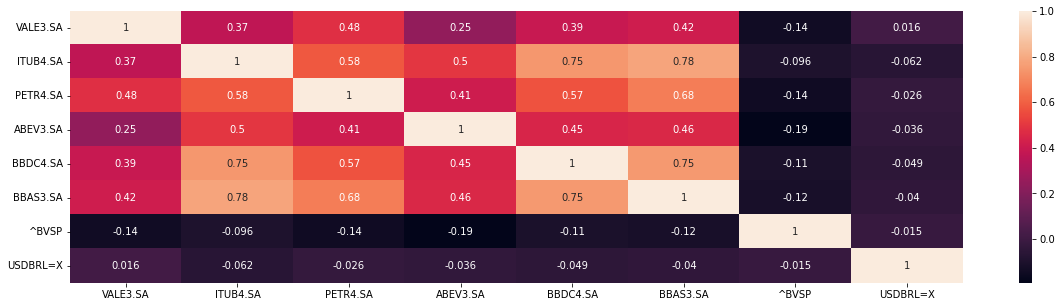

In [79]:
ax, fig = plt.subplots(figsize=(20,5))
ax = sns.heatmap(correlacao.corr(), annot=True)

**Visualização de dados usando Plotly**

In [80]:
!pip install plotly

In [86]:
import plotly.graph_objs as go

In [95]:
def plot_lines(df_,columns=['Open','Close','High','Low']):

  fig = go.Figure()
  for c in columns:
    fig.add_trace(go.Scatter(x = list(df_.index), #Scatter é um gráfico de ponto
                             y = df_[c],
                             mode = 'markers+lines',
                             name = c))
    return fig

In [96]:
plot_lines(df)

In [109]:
def plotCandleStick(df, acao='ticket'):
  trace1 = {
      'x': df.index,
      'open': df.Open,
      'close': df.Close,
      'high': df.High,
      'low': df.Low,
      'type': 'candlestick',
      'name': acao,
      'showlegend': False
  }

  data = [trace1]
  layout = go.Layout()

  fig = go.Figure(data=data, layout=layout)
  return fig

In [110]:
plotCandleStick(df)